### Problem 1: Regression

The dataset `lab03_dataset_1.csv` has the results of fraud investigations of 5,960 cases. For this task, you will use the input features *FRAUD, TOTAL_SPEND, NUM_CLAIMS, MEMBER_DURATION, OPTOM_PRESC, NUM_MEMBERS* to predict the output *DOCTOR_VISITS*.

### 1.a

1. Normalize the entire dataset.
2. Use a train-test split of 80-20.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("lab03_dataset_1.csv")
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X = df_scaled[["FRAUD","TOTAL_SPEND","NUM_CLAIMS","MEMBER_DURATION","OPTOM_PRESC","NUM_MEMBERS"]]
y = df_scaled["DOCTOR_VISITS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(4768, 6) (1192, 6)


### 1.b

Use sklearn's `LinearRegression` and `SGDRegressor` models for training and output their mean squared error on the test set. Your MSE should be less 1.0.

In [2]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

sgr = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgr.fit(X_train, y_train)
y_pred_sgr = sgr.predict(X_test)
mse_sgr = mean_squared_error(y_test, y_pred_sgr)

print(mse_lr)
print(mse_sgr)

0.9117467089236777
0.9096103268095768


### 1.c

Use sklearn's `KNeighborsRegressor` model for training and output their mean squared error on the test set. Your MSE should be less 0.9. Feel free to tweak the parameters of neighbors, algorithm, and metric in the `KNeighborsRegressor` function to reach the desired MSE.

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3, algorithm="auto", metric="euclidean")
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(mse_knn)

0.9442078203064479


### Problem 2: PCA

`lab03_dataset_2.csv` contains 205 observations on various vehicles. This is an unsupervised training data. You will use the entire dataset for `PCA`.

### 2.a

For the 14 input features, drop any rows with missing numerical values and output the new length of the training dataset.

In [5]:
import pandas as pd
import numpy as np
df2 = pd.read_csv("lab03_dataset_2.csv")
df2_cleaned = df2.replace('?', np.nan)
df2_cleaned = df2_cleaned.apply(pd.to_numeric, errors='coerce')
df2_cleaned = df2_cleaned.dropna()
print("Length of dataset after dropping NaNs:", len(df2_cleaned))

Length of dataset after dropping NaNs: 195


### 2.b

Using the sklearn's `PCA` method, compute all the principal components (PCs) of the normalized dataset. All the PCs capture a fraction of the total variance, output all the variances captured by all the PCs. Write a code snippet that checks all the PCs and selects the `top k PCs` whose total variance captured is atleast `90%`. What did `k` come out to be?

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2_cleaned)
pca_all = PCA(n_components=data_scaled.shape[1])
pca_all.fit(data_scaled)
print(pca_all.explained_variance_ratio_)
cum_var = np.cumsum(pca_all.explained_variance_ratio_)
k = np.argmax(cum_var >= 0.90) + 1
print("k:", k)

[0.53798682 0.16280221 0.08686665 0.06497251 0.04349587 0.02969316
 0.02289992 0.01929611 0.00859352 0.00790007 0.00582772 0.00458718
 0.00367119 0.00140706]
k: 6


### 2.c

Using the `top k PCs`, apply `dimensionality reduction` on the normalized dataset to generate and display the transformed dataset which should now have only `k columns`. Display the output as a DataFrame.

In [7]:
pca_k = PCA(n_components=k)
data_transformed = pca_k.fit_transform(data_scaled)
df_transformed = pd.DataFrame(data_transformed, columns=["PC"+str(i+1) for i in range(k)])
print(df_transformed)

          PC1       PC2       PC3       PC4       PC5       PC6
0   -0.612999 -2.164573 -0.298752 -2.436486  0.194563 -0.116741
1   -0.493886 -2.190732 -0.248341 -2.476630  0.331332 -0.157826
2    0.443900 -1.365449  1.449443  0.626999  0.359939 -2.002387
3   -0.178982 -0.256392  0.066248  1.153280  0.277470  0.118314
4    1.269804 -1.167075  0.018756  1.204362  0.048029 -0.332126
..        ...       ...       ...       ...       ...       ...
190  2.600083  0.420264 -1.077006  0.461281  0.101035  1.002321
191  3.448779 -0.236803 -1.025905  0.333152  0.002958  0.842925
192  3.449740 -0.496868 -1.466348  0.347475  0.868250  0.062013
193  2.329514  2.962563  1.129910  0.613319  2.005477 -0.648051
194  3.237368  0.114364 -1.090690  0.473486  0.217148  0.864490

[195 rows x 6 columns]


### 2.d

We learned in class that we can also obtain the PCs using a matrix decomposition technique called `SVD:` $X=U\Lambda V$. Use `SVD` on the original normalized dataset to obtain the 3 decomposed matrices and output them.

In [8]:
U, s, Vt = np.linalg.svd(data_scaled, full_matrices=False)
Lambda = np.diag(s)
V = Vt.T
print(U)
print(Lambda)
print(V)

[[-0.0159953   0.10267409  0.01940005 ...  0.10111417 -0.04843851
   0.00862821]
 [-0.01288723  0.1039149   0.01612654 ...  0.07900948 -0.06227152
   0.02162727]
 [ 0.01158291  0.06476851 -0.09412247 ... -0.09826148 -0.02714196
  -0.06765328]
 ...
 [ 0.09001591  0.02356835  0.09522025 ...  0.02101279  0.11135799
  -0.06265885]
 [ 0.06078525 -0.14052582 -0.07337294 ... -0.08517798  0.00074339
   0.1394281 ]
 [ 0.08447437 -0.00542472  0.07082615 ... -0.03433806 -0.04111474
  -0.08342516]]
[[38.32367451  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         21.08198364  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         15.39954383  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.  

### 2.e 

Generate the `k` (obtained from 2.b) largest eigenvalues from the decomposed matrices obtained from the `SVD`. Remember, eigenvalue $\lambda=\Lambda^2/n$

In [9]:
n = data_scaled.shape[0]
eigenvalues = (s**2) / n
top_k_eigenvalues = eigenvalues[:k]
print(top_k_eigenvalues)

[7.53181553 2.27923094 1.21613308 0.90961519 0.60894217 0.4157043 ]


### 2.f 

Generate the projections of the normalized dataset using the `first k PCs` obtained from the `SVD` and display it inside a DataFrame.

In [10]:
proj = data_scaled.dot(V[:, :k])
df_proj = pd.DataFrame(proj, columns=["PC"+str(i+1) for i in range(k)])
print(df_proj)

          PC1       PC2       PC3       PC4       PC5       PC6
0   -0.612999  2.164573  0.298752  2.436486 -0.194563  0.116741
1   -0.493886  2.190732  0.248341  2.476630 -0.331332  0.157826
2    0.443900  1.365449 -1.449443 -0.626999 -0.359939  2.002387
3   -0.178982  0.256392 -0.066248 -1.153280 -0.277470 -0.118314
4    1.269804  1.167075 -0.018756 -1.204362 -0.048029  0.332126
..        ...       ...       ...       ...       ...       ...
190  2.600083 -0.420264  1.077006 -0.461281 -0.101035 -1.002321
191  3.448779  0.236803  1.025905 -0.333152 -0.002958 -0.842925
192  3.449740  0.496868  1.466348 -0.347475 -0.868250 -0.062013
193  2.329514 -2.962563 -1.129910 -0.613319 -2.005477  0.648051
194  3.237368 -0.114364  1.090690 -0.473486 -0.217148 -0.864490

[195 rows x 6 columns]


### Problem 3: Clustering 

`lab03_dataset_3.csv` contains 239 observations with two input features *x1* and *x2*.

`lab03_dataset_4.csv` contains 1440 observations with two input features *x1* and *x2*.

For this task, you will perform various clustering-related operations using the `sklearn clustering` module.

### 3.a

Using `lab03_dataset_3.csv`, apply sklearn's `KMeans` algorithm on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `KMeans` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure for every iteration of different cluster-count, your scatterplot should use `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot that score against `K`. Label the plot axes accordingly.

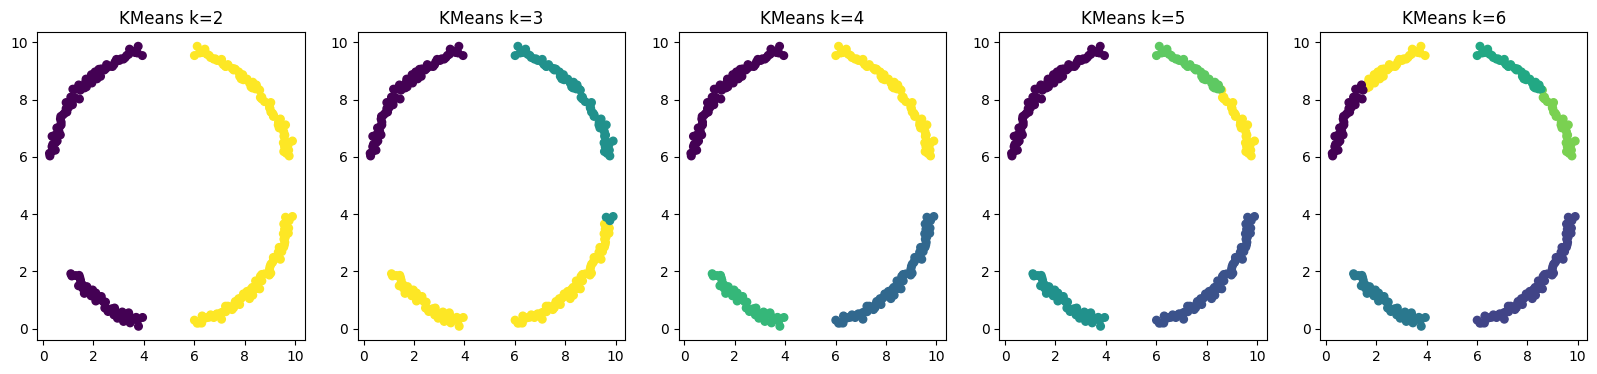

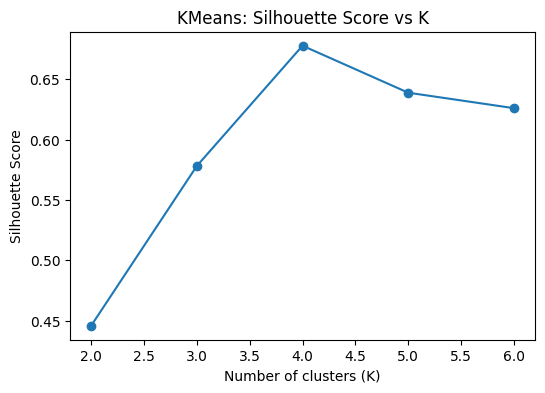

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df3 = pd.read_csv("lab03_dataset_3.csv")
X3 = df3[['x1', 'x2']].values

sil_scores_kmeans = []
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, k in enumerate(range(2, 7)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X3)
    sil = silhouette_score(X3, labels)
    sil_scores_kmeans.append(sil)
    axes[i].scatter(X3[:, 0], X3[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].set_title(f"KMeans k={k}")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(range(2,7), sil_scores_kmeans, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("KMeans: Silhouette Score vs K")
plt.show()


### 3.b

Repeat `3.a` but instead use sklearn's `GaussianMixture` model for learning.

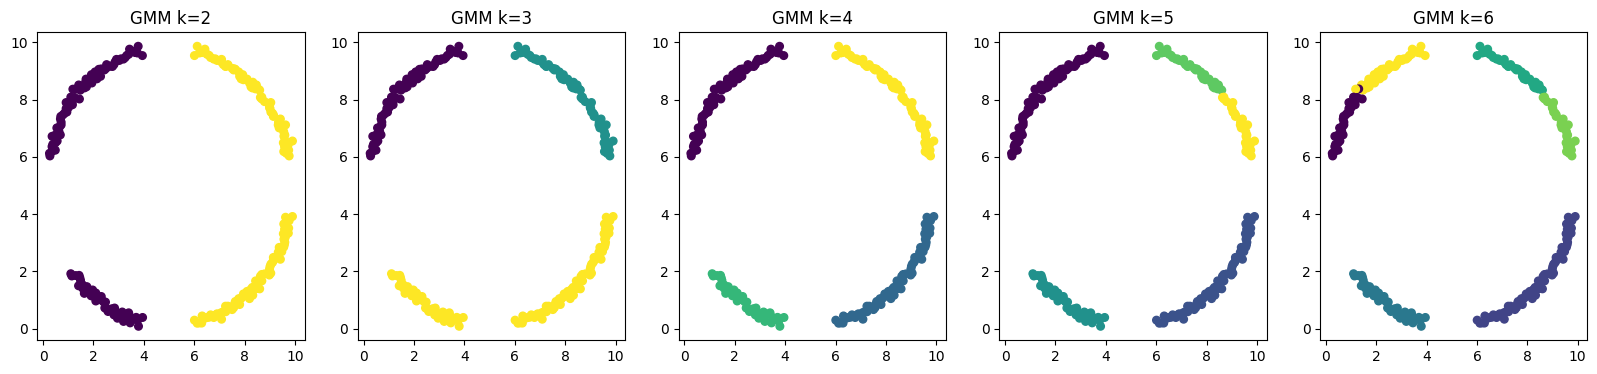

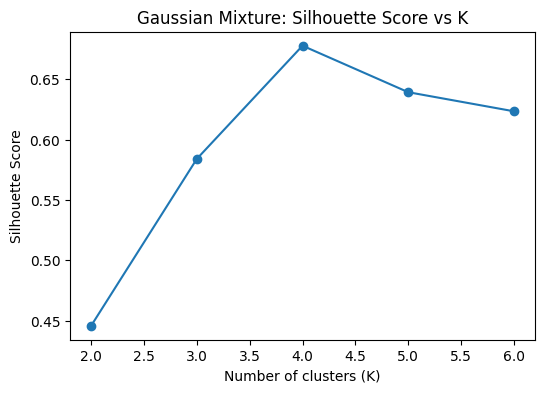

In [12]:
from sklearn.mixture import GaussianMixture

sil_scores_gmm = []
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, k in enumerate(range(2, 7)):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X3)
    labels = gmm.predict(X3)
    sil = silhouette_score(X3, labels)
    sil_scores_gmm.append(sil)
    axes[i].scatter(X3[:, 0], X3[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].set_title(f"GMM k={k}")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(range(2,7), sil_scores_gmm, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Gaussian Mixture: Silhouette Score vs K")
plt.show()


### 3.c

Using `lab03_dataset_4.csv`, apply sklearn's `AgglomerativeClustering` on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `AgglomerativeClustering` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure your scatterplot uses `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot the `Silhouette score` against `K clusters`. Label the plot axes accordingly.

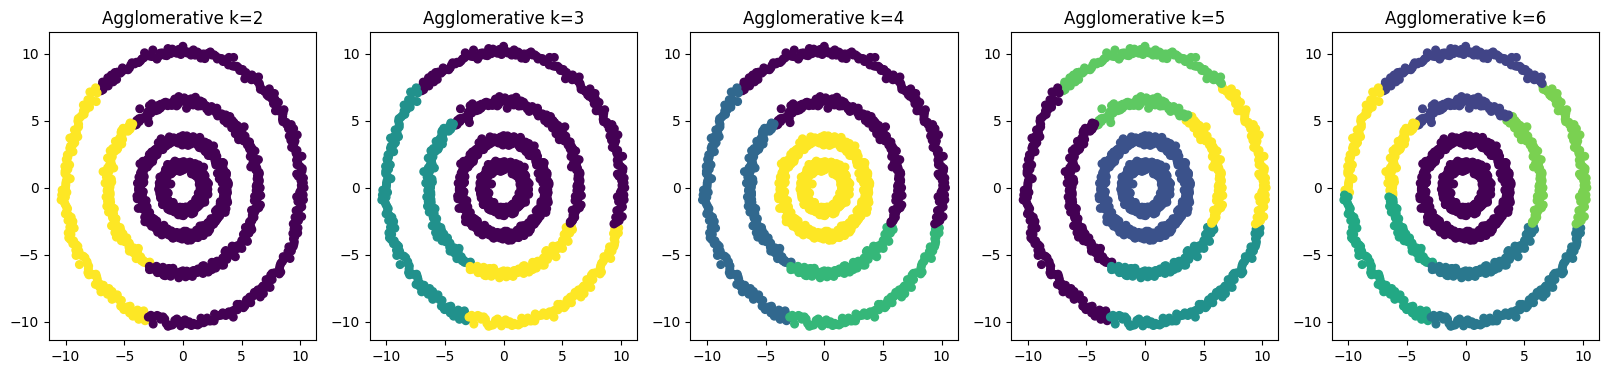

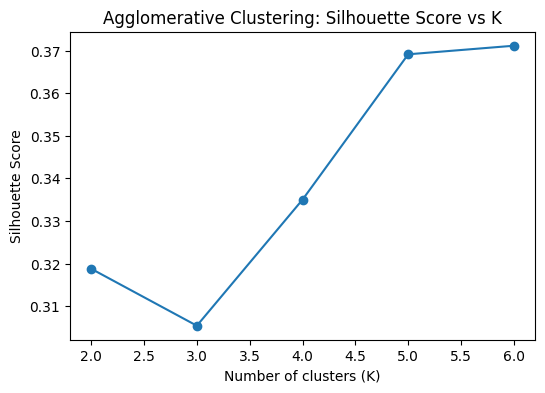

In [13]:
from sklearn.cluster import AgglomerativeClustering

df4 = pd.read_csv("lab03_dataset_4.csv")
X4 = df4[['x1', 'x2']].values

sil_scores_agglo = []
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, k in enumerate(range(2, 7)):
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X4)
    sil = silhouette_score(X4, labels)
    sil_scores_agglo.append(sil)
    axes[i].scatter(X4[:, 0], X4[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].set_title(f"Agglomerative k={k}")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(range(2,7), sil_scores_agglo, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Agglomerative Clustering: Silhouette Score vs K")
plt.show()


### 3.d

Repeat `3.c` but instead use sklearn's `SpectralClustering` model for learning.

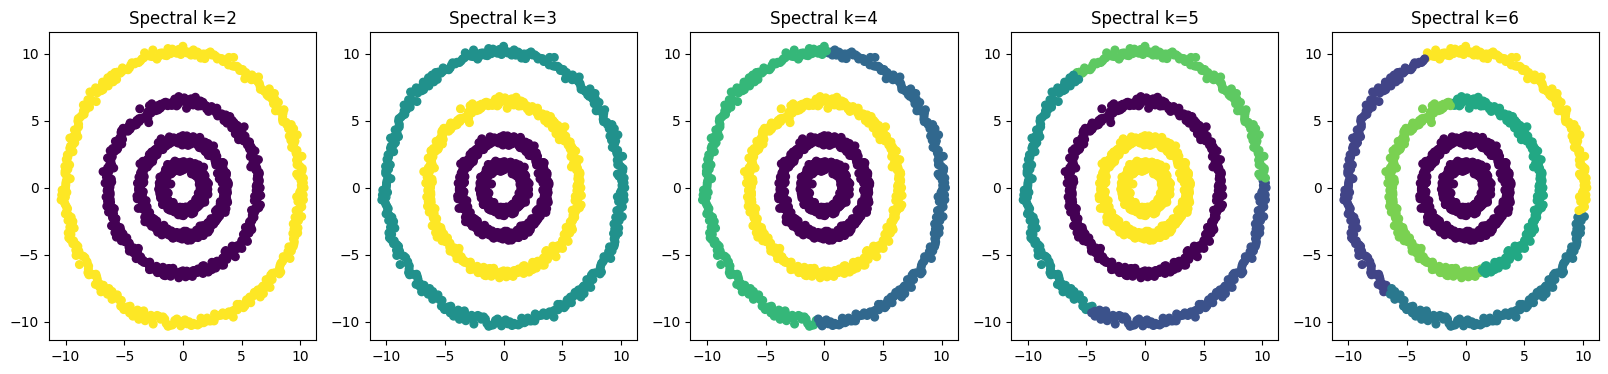

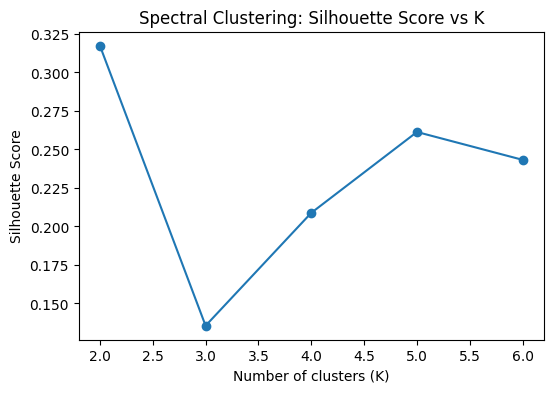

In [15]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores_spectral = []
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, k in enumerate(range(2, 7)):
    spectral = SpectralClustering(n_clusters=k, affinity='rbf', random_state=42)
    labels = spectral.fit_predict(X4)
    sil = silhouette_score(X4, labels)
    sil_scores_spectral.append(sil)
    axes[i].scatter(X4[:, 0], X4[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].set_title(f"Spectral k={k}")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), sil_scores_spectral, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Spectral Clustering: Silhouette Score vs K")
plt.show()


### 3.e

The dataset `lab03_dataset_4.csv` generates 4 concentric rings, so ideally we would want 4 clusters representing the 4 concentric rings. Did the clustering attempts in `3.c` and `3.d` lead to 4 concentric ring clusters. Explore some other sklearn clustering algorithms to see which one can actually produce 4 clusters corresponding with the 4 concentric rings and display it.

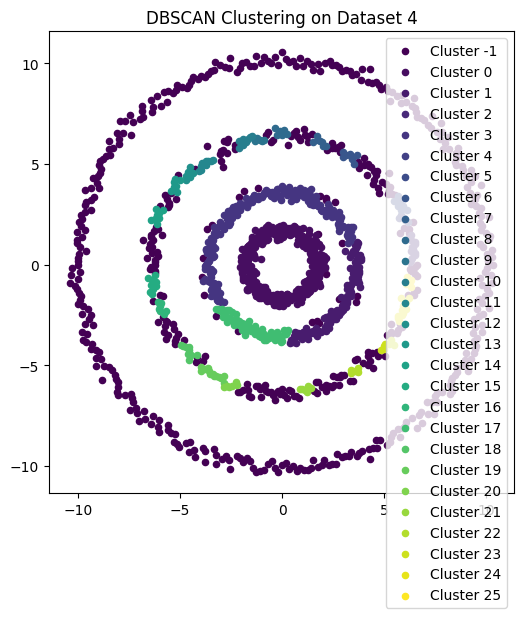

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

df4 = pd.read_csv('lab03_dataset_4.csv')
X4 = df4[['x1', 'x2']].values

dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X4)
labels_dbscan = dbscan.labels_
unique_labels = np.unique(labels_dbscan)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(6,6))
for label, color in zip(unique_labels, colors):
    idx = labels_dbscan == label
    plt.scatter(X4[idx, 0], X4[idx, 1], c=[color], s=20, label=f'Cluster {label}')
plt.title('DBSCAN Clustering on Dataset 4')
plt.legend()
plt.show()


### Problem 4: MLP Classification

`lab03_dataset_5.csv` contains 103,904 observations on airlines customer reviews. For this classification task, use the sklearn's `MLPClassifier` method, where the output class is the `Satisfaction` column which has a binary value of `Satisfied` or `Unsatisfied` and the remaining columns are the input features.

### 4.a

1. Drop any rows with missing values.
2. Output the new length of the final training dataset.
3. Apply encoding to convert all categorical features into numerical values.
4. Normalize the input features.
5. Apply a train-test split of 70-30.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("lab03_dataset_5.csv")
df_clean = df.dropna()
print("New length of dataset:", len(df_clean))
X = df_clean.drop("Satisfaction", axis=1)
y = df_clean["Satisfaction"]
y = y.map({"Satisfied": 1, "Unsatisfied": 0})
X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Length of training dataset:", len(X_train))


New length of dataset: 103594
Length of training dataset: 72515


### 4.b 

Build a `MLPClassifier` neural network with 3 hidden layers, with 10 neurons in each of those layers, and using the `ReLU` activation function. Output the `mean squared error` between the test cases and the neural network predictions.

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

mlp_relu = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="relu", max_iter=200, random_state=42)
mlp_relu.fit(X_train, y_train)
y_pred_relu = mlp_relu.predict(X_test)
mse_relu = mean_squared_error(y_test, y_pred_relu)
print("ReLU MSE:", mse_relu)


ReLU MSE: 0.04305157823610798


### 4.c

Repeat all the tasks in 4.b while using the `tanh` activation function.

In [22]:
mlp_tanh = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='tanh', max_iter=300, random_state=42)
mlp_tanh.fit(X_train, y_train)

y_pred_tanh = mlp_tanh.predict(X_test)
mse_tanh = mean_squared_error(y_test, y_pred_tanh)

print("tanh MSE:", mse_tanh)


tanh MSE: 0.04392033205701599


### 4.d

Plot the training loss trajectory together for both the neural network models generated above using two different activation functions. Make sure to add legends and labels to your plot.

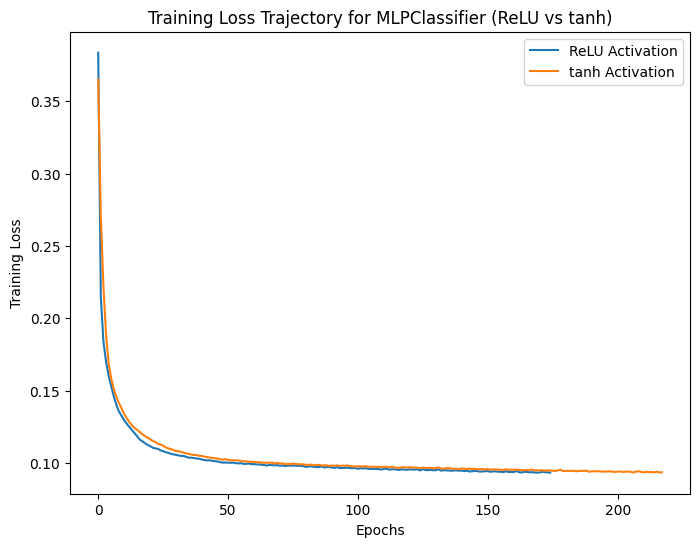

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(mlp_relu.loss_curve_, label="ReLU Activation")
plt.plot(mlp_tanh.loss_curve_, label="tanh Activation")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Trajectory for MLPClassifier (ReLU vs tanh)")
plt.legend()
plt.show()


### Problem 5: MLP Regression

`lab03_dataset_6.csv` contains 973 observations on gym data. For this prediction task, use the sklearn's `MLPRegressor` method, where the real-valued output feature is the `BMI` column and the remaining columns are the input features.

### 5.a 

1. Drop any rows with missing values.
2. Output the new length of the final training dataset.
3. Apply encoding to convert all categorical features into numerical values.
4. Normalize the input features.
5. Apply a train-test split of 80-20.

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df6 = pd.read_csv("lab03_dataset_6.csv")
df6_clean = df6.dropna()
print("Length of dataset after dropping NaNs:", len(df6_clean))
df6_encoded = pd.get_dummies(df6_clean)
X = df6_encoded.drop("BMI", axis=1)
y = df6_encoded["BMI"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Length of training dataset:", len(X_train))


Length of dataset after dropping NaNs: 973
Length of training dataset: 778


### 5.b

Build a `MLPRegressor` neural network with 3 hidden layers, with 10 neurons in each of those layers, and using the `tanh` activation function. Output the `mean squared error` between the test cases and the neural network predictions.

In [31]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_tanh = MLPRegressor(hidden_layer_sizes=(10, 10, 10),
                        activation="tanh",
                        max_iter=1000,    
                        tol=1e-6,        
                        random_state=42)
mlp_tanh.fit(X_train, y_train)
y_pred_tanh = mlp_tanh.predict(X_test)
mse_tanh = mean_squared_error(y_test, y_pred_tanh)
print("Mean Squared Error (tanh):", mse_tanh)


Mean Squared Error (tanh): 15.202282592112201


### 5.c

Repeat all the tasks in 5.b while using the `sigmoid` activation function.

In [32]:
mlp_sigmoid = MLPRegressor(hidden_layer_sizes=(10, 10, 10),
                           activation="logistic",  
                           max_iter=1000,          
                           tol=1e-6,               
                           random_state=42)
mlp_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = mlp_sigmoid.predict(X_test)
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
print("Mean Squared Error (sigmoid):", mse_sigmoid)


Mean Squared Error (sigmoid): 23.800274894441817


### 5.d

Plot the training loss trajectory together for both the neural network models generated above using two different activation functions. Make sure to add legends and labels to your plot.

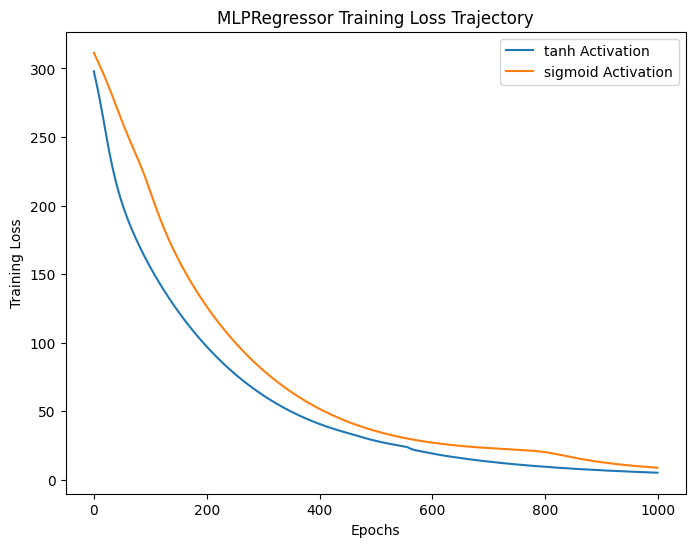

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(mlp_tanh.loss_curve_, label="tanh Activation")
plt.plot(mlp_sigmoid.loss_curve_, label="sigmoid Activation")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("MLPRegressor Training Loss Trajectory")
plt.legend()
plt.show()
